In [2]:
import data.reader as datareader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import models.model as model
import models.training as trainer
import torch
import models.gradcam as gradcam
import data.utils as utils
import cv2
from torchvision import transforms



In [3]:
tl_model = model.transfer_learning_model()
tl_model.make_model()
tl_model.load_model(save_path="D:\\Documents\\python\\bad_apples\\models\\weights",
                    name = "\\model_train_full.pth")

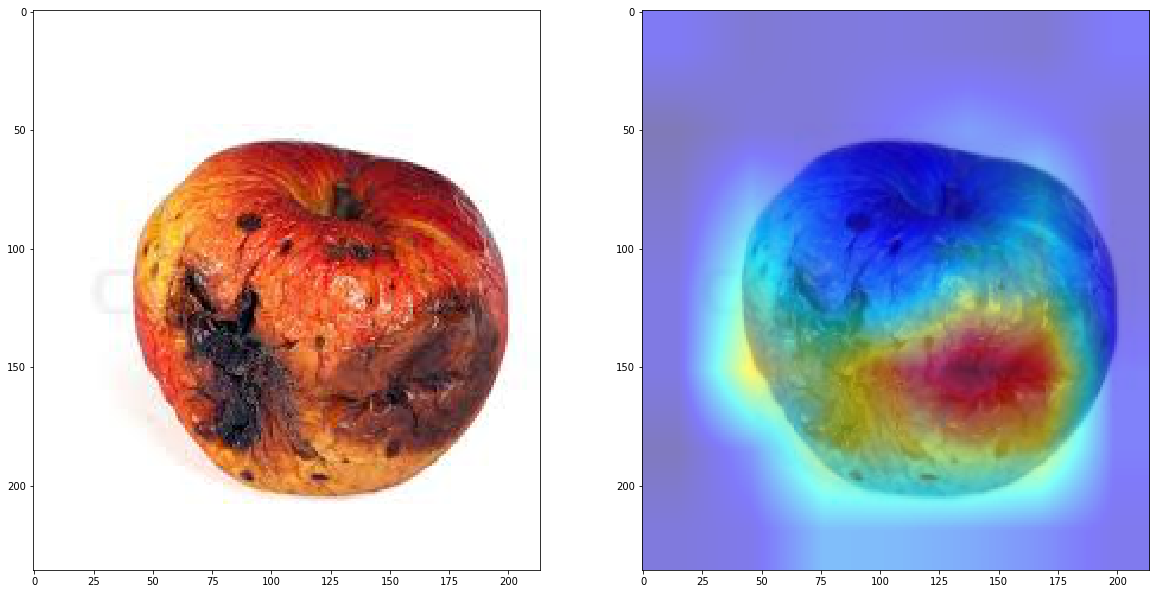

In [13]:
grad_cam = gradcam.GradCam(model = tl_model.model.to('cpu'))
fname= "D:\\Documents\\python\\bad_apples\\data\\raw\\val\\rotten apple\\pic_008.jpg"
img = cv2.imread(fname, 1)
img = np.float32(cv2.resize(img, (224, 224))) / 255
input = utils.preprocess_ocv_image(img)
maps =  grad_cam(input) 
feature_image = maps.squeeze(dim=0)
feature_image = transforms.ToPILImage()(feature_image)

plt.figure(figsize=(20,20))
img = cv2.imread(fname, 1)
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow( cv2.resize(np.array(feature_image), tuple(img.shape[0:2][::-1]) ) )
plt.show()